In [1]:
from eigsep_corr import gain_cal
import matplotlib.pyplot as plt

In [11]:
nv_conf = {
    "fem": "012",
    "fiber": "2",
    "pam": "376",
    "snap": ("C000091", ["N0", "E2"]),
}

sv_conf = {
    "fem": "320",
    "fiber": "4",
    "pam": "378",
    "snap": ("C000091", ["N4", "E6"]),
}

In [12]:
nv = gain_cal.SignalChain()
for m, v in nv_conf.items():
    if m == "snap":
        id_num, keys = v
    else:
        id_num = v
        keys = ["north", "east"]
    nv.add_module(m, id_num, keys=keys)
    
sv = gain_cal.SignalChain()
for m, v in sv_conf.items():
    if m == "snap":
        id_num, keys = v
    else:
        id_num = v
        keys = ["north", "east"]
    sv.add_module(m, id_num, keys=keys)

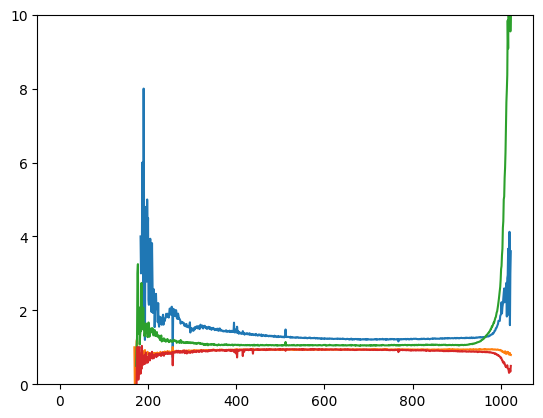

/tmp/ipykernel_76757/610866934.py:8: RuntimeWarning: invalid value encountered in multiply
  ratios[pol] *= r


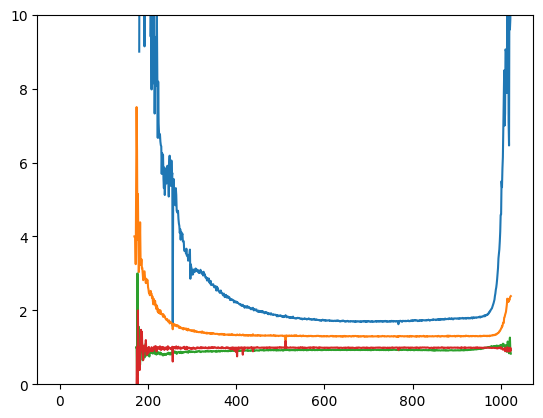

/tmp/ipykernel_76757/610866934.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(ratios["east"] / ratios["north"])
/tmp/ipykernel_76757/610866934.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(ratios["east"] / ratios["north"])


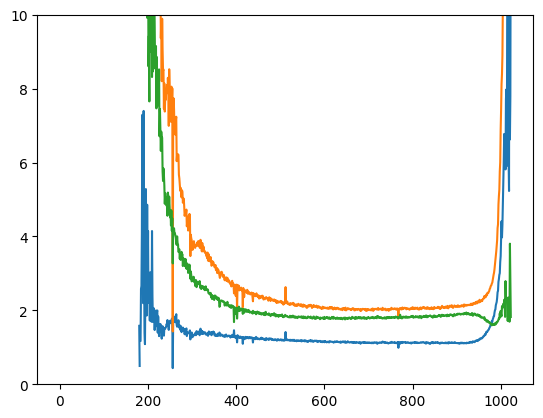

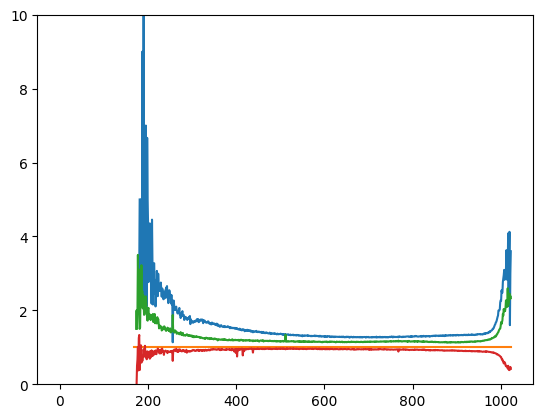

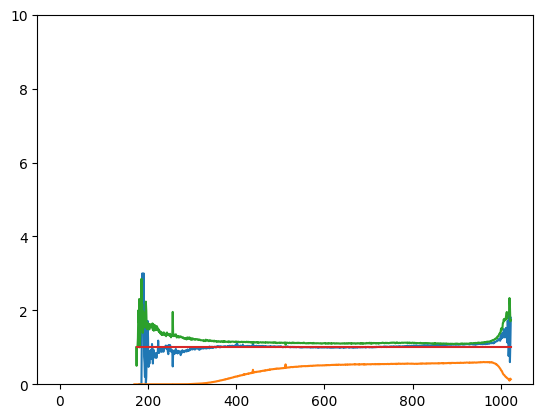

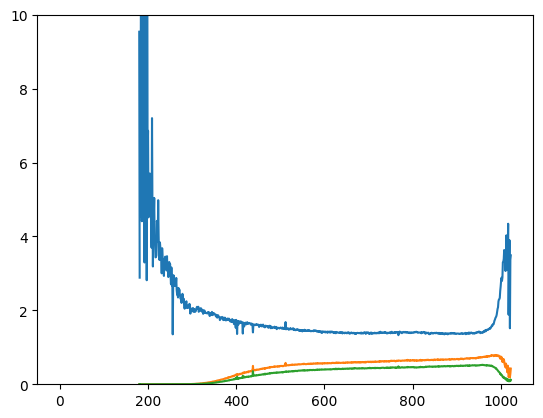

In [15]:
for v in (nv, sv):

    ratios = {"north": 1, "east": 1}
    for pol in ("north", "east"):
        plt.figure()
        for m, gr in v.gain_ratios.items():
            r = gr[pol]
            ratios[pol] *= r
            plt.plot(r)
        plt.ylim(0, 10)
        plt.show()

    plt.figure()
    plt.plot(ratios["north"])
    plt.plot(ratios["east"])
    plt.plot(ratios["east"] / ratios["north"])
    plt.ylim(0, 10)
    plt.show()